# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Roger Cheng
- Deyin Chen
- Haoyin Xu
- Suzhou Yang
- Sowmya Parthiban

# Group Members IDs

- A14743993
- A92099144
- A15305349
- A92090309
- A13790839

# Research Question

Ever since the early 1900s, movies (or so called "moving pictures") has became a popular leisure activity. Due to the increased financial prosperity, Americans had more disposible money to allow themselves attending the cinema far more regular than the previous decade. As the time progresses, styles and theme of movies evolve drastically due to both technology development and cultural evolution. Audience's favor into the types of movie has evolves accordingly as well. Thus, in this project, we are interested to see **what components attributes to a movie's revenue in the recent decade. Examining a movie's components such as the genre, content, director, actors, length, etc., we want to see how each component would affect the final revenue.** We believe that revenue could represent the popularity of a movie and thus it could help us to visualize the evolution of audience's interest in the recent decade. 


## Background and Prior Work

Films have been recognized to have artistic, educational and commercial values for a society. They are also a way to express and popularize current thoughts, ideas and concerns. More importantly, they indicate the development of technology and dominating ideology of the society. Big film companies in the world usually put billions of dollars into filmmaking as well as advertisement. However, over 70% of the films made negative profit, while the total average revenue of the film industry was around $10 billion each year [1]. Therefore, the high-risk but high-profit property of the films makes the study about factors contributing to a successful film and an accurate prediction method for the film revenue extremely desired for the filmmakers and investigators to make better investment decisions on film production and advertisement. 

It would also be a huge benefit if there could be a prediction method of a successful film with a high accuracy. Indeed, there have been many studies about films trying to get a good prediction method. Studies found that multiple factors could be related to a movie’s revenue. Although specific weights were not reported for most studies, they found that factors such as cast, budget, film review, actors, directors and genre contributed to the revenue [2, 3]. In particular, a study with modest prediction ability found that horror movies were the most popular movies and the Motion Picture Association of America film rating system had the largest contribution to domestic gross in the US [4]. 

Among the recent studies, Nithin et al. generated one of the most accurate models to predict the film revenue with around 51 percent accuracy using IMDB data and linear regression. However, they admitted the accuracy was not high enough for industrial use and suggested to use a larger training set [2]. Apte et al. also found that generally low revenue movies had a much lower prediction accuracy compared to high revenue movies due the incompleteness of data from global box office, and some genres might not have enough samples for them to train their model and resulted in a low accuracy [3]. Moreover, the data the groups used to train their models was out of date. Due to the inevitable changes in audience’s tastes, using data only from 2000 to 2012 would make the model less accurate to predict film revenue after 2019. 

Therefore, in this project, we will combine and organize two datasets that contain information about movies extracted from The Movie Database (TMDb) and MovieLens. These datasets have more than 50,000 entries in total and information up to July 2017. Our goal is to use these up-to-date datasets and a better algorithm to analyze the weights of factors that determine the revenue and to generate a model that will have a higher accuracy in revenue prediction. 



### References:
- 1) "The Numbers - Movie Market Summary 1995 to 2011." The Numbers - Movie Box
Office Data, Film Stars, Idle Speculation. Web. <http://www.the-numbers.com/market/>.
- 2) NithinV, R., & Babu, S. (2017). Predicting Movie Success Based On Imdb Data.
- 3) Apte, N., Forssell, M., & Sidhwa, A. (2011). Predicting Movie Revenue. CS229, Stanford University.
- 4) Hu, X. (n.d.). Predicting Domestic Gross of Movies. Retrieved from https://www.stat.berkeley.edu/~aldous/Research/Ugrad/ugrad_res_old.html.


# Hypothesis


Our null hypothesis is the genre, content, and the megascore will be the most influential variables to the revenue. 

# Dataset(s)

### Dataset 1
- Dataset Name: The Movies Dataset
- Link to the dataset: https://www.kaggle.com/rounakbanik/the-movies-dataset/downloads/the-movies-dataset.zip/7
- Number of observations: 45467

All movies released before
and in July 2017 were collected from the Full MovieLens Dataset. 45467 movies were included in this dataset with each surveyed for its
cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies,
countries, TMDb vote counts and vote averages.

### Dataset 2
- Dataset Name: TMDB 5000 Movie Dataset
- Link to the dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv
- Number of observations: 5000

5000 movies released between 1916 and 2017 were randomly extracted from The Movie Database (TMDb). Each movie was surveyed for its keywords, overview, production company, crew, cast,
runtime, average rating, number of ratings, and revenue.

# Data Wrangling

In [85]:
# importing necessary packages for data editing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# important packages for data analysis
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [86]:
# import both dataset into a pandas dataframe
tmdb_df = pd.read_csv('tmdb_5000_movies.csv')
tmdb_df2 = pd.read_csv('movies_metadata.csv')

# visualize one of the data table
print(tmdb_df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

# Data Cleaning

As shown from the previous section, the format of most of the cells was very messy. For instance, there were many random symbols and random information like "id" under the *"production_companies"* column. Same scenerio happened to the *"production_countries"* and many other columns as well. Thus, we need to clean up the format and extract the needed information from these cells. 

Also, many of the information were not needed for us such as the "spoken language" column. Thus, we need to drop all the unnecessary columns in order to facilitate our analysis process. During the process, we also drop all the rows that doesn't contain a value for "revenue" column. 

Finally, we merge both data set into one by their title, genres, original language, production countries, release date, runtime, popularity, vote count, vote average, budget and revenue.

In [87]:
# Method to help extracting the genres information from cells
def trim_genres(genres):
    g_list = []
    b = 0
    a = 0
    while (a != -1 and b != -1):
        a = genres.find("name")
        b = genres.find("}")
        g_list.append(genres[a+8:b-1])
        genres = genres [b+1:]
        if (len(genres) == 1):
            break
    g_list.sort()
    return g_list

In [88]:
# dropping unneeded columns and the rows with missing data
tmdb_df = tmdb_df.drop(columns = ['homepage','id','production_companies','keywords','overview','tagline','status', 'original_title','spoken_languages'])
tmdb_df = tmdb_df.dropna()

# Transform the genres and production_countries column to only contains the information we needed
tmdb_df['genres'] = tmdb_df['genres'].apply(trim_genres)
tmdb_df['production_countries'] = tmdb_df['production_countries'].apply(trim_genres)
tmdb_df['genres'] = tmdb_df['genres'].apply(tuple)
tmdb_df['production_countries'] = tmdb_df['production_countries'].apply(tuple)

In [89]:
# same cleanning procedure for the second data set
tmdb_df2 = tmdb_df2.drop(columns = ['adult','belongs_to_collection','homepage', 'id', 'imdb_id','status', 'tagline','video','original_title','poster_path','production_companies','spoken_languages','overview' ])
tmdb_df2 = tmdb_df2.dropna()
tmdb_df2['genres'] = tmdb_df2['genres'].apply(trim_genres)
tmdb_df2['production_countries'] = tmdb_df2['production_countries'].apply(trim_genres)
tmdb_df2['genres'] = tmdb_df2['genres'].apply(tuple)
tmdb_df2['production_countries'] = tmdb_df2['production_countries'].apply(tuple)
tmdb_df2 = tmdb_df2.fillna(0)

# change the type of these columns
tmdb_df2.budget = tmdb_df2.budget.astype(np.int64)
tmdb_df2.popularity = tmdb_df2.popularity.astype(np.float64)
tmdb_df2.revenue = tmdb_df2.revenue.astype(np.int64)
tmdb_df2.vote_count = tmdb_df2.vote_count.astype(np.int64)



In [91]:
# merge two data set into one and drop the duplicated ones, save it as a new csv file
merge_df = pd.merge(tmdb_df,tmdb_df2,on = ['budget','genres','original_language','popularity','production_countries','release_date','revenue','runtime','title','vote_average','vote_count'] , how = 'outer')
merge_df = merge_df[merge_df['revenue'] != 0]
merge_df = merge_df.drop_duplicates(subset = 'title', keep = 'first')
merge_df=merge_df[['title','genres','original_language','production_countries','release_date','runtime','popularity','vote_count','vote_average','budget','revenue']]
merge_df.to_csv('trimmed_data.csv')
# visulize the new dataset
merge_df

,title,genres,original_language,production_countries,release_date,runtime,popularity,vote_count,vote_average,budget,revenue
0,Avatar,"(Action, Adventure, Fantasy, Science Fiction)",en,"(United Kingdom, United States of America)",2009-12-10,162.0000,150.4376,11800,7.2000,237000000,2787965087
1,Pirates of the Caribbean: At World's End,"(Action, Adventure, Fantasy)",en,"(United States of America,)",2007-05-19,169.0000,139.0826,4500,6.9000,300000000,961000000
2,Spectre,"(Action, Adventure, Crime)",en,"(United Kingdom, United States of America)",2015-10-26,148.0000,107.3768,4466,6.3000,245000000,880674609
3,The Dark Knight Rises,"(Action, Crime, Drama, Thriller)",en,"(United States of America,)",2012-07-16,165.0000,112.3130,9106,7.6000,250000000,1084939099
4,John Carter,"(Action, Adventure, Science Fiction)",en,"(United States of America,)",2012-03-07,132.0000,43.9270,2124,6.1000,260000000,284139100
5,Spider-Man 3,"(Action, Adventure, Fantasy)",en,"(United States of America,)",2007-05-01,139.0000,115.6998,3576,5.9000,258000000,890871626
6,Tangled,"(Animation, Family)",en,"(United States of America,)",2010-11-24,100.0000,48.6820,3330,7.4000,260000000,591794936
7,Avengers: Age of Ultron,"(Action, Adventure, Science Fiction)",en,"(United States of America,)",2015-04-22,141.0000,134.2792,6767,7.3000,280000000,1405403694
8,Harry Potter and the Half-Blood Prince,"(Adventure, Family, Fantasy)",en,"(United Kingdom, United States of America)",2009-07-07,153.0000,98.8856,5293,7.4000,250000000,933959197
9,Batman v Superman: Dawn of Justice,"(Action, Adventure, Fantasy)",en,"(United States of America,)",2016-03-23,151.0000,155.7905,7004,5.7000,250000000,873260194


# Data Analysis & Results

We first sorted the cleaned dataset by each movie's revenue from high to low as reported by the two original datasets.

## Data set sorted according to the revenue

In [7]:
df = pd.read_csv('trimmed_data.csv',index_col = 0)


In [8]:
df = df.sort_values(by = ['revenue'],ascending=False)
df.head(5)

,title,genres,original_language,production_countries,release_date,runtime,popularity,vote_count,vote_average,budget,revenue
0,Avatar,"('Action', 'Adventure', 'Fantasy', 'Science Fi...",en,"('United Kingdom', 'United States of America')",2009-12-10,162.0,150.437577,11800,7.2,237000000,2787965087
31274,Star Wars: The Force Awakens,"('Action', 'Adventure', 'Fantasy', 'Science Fi...",en,"('United States of America',)",2015-12-15,136.0,31.626013,7993,7.5,245000000,2068223624
25,Titanic,"('Drama', 'Romance', 'Thriller')",en,"('United States of America',)",1997-11-18,194.0,100.025899,7562,7.5,200000000,1845034188
16,The Avengers,"('Action', 'Adventure', 'Science Fiction')",en,"('United States of America',)",2012-04-25,143.0,144.448633,11776,7.4,220000000,1519557910
28,Jurassic World,"('Action', 'Adventure', 'Science Fiction', 'Th...",en,"('United States of America',)",2015-06-09,124.0,418.708552,8662,6.5,150000000,1513528810


We then plotted a bar graph in order to visualize the genres of the 50 most profitable movies.

## Movie genres of the top 50 revenues

As the bar graph has suggested, 9 movies has a combined genre of ('Action', 'Adventure', 'Fantasy'). 8 movies have a combined genre of ('Action', 'Adventure', 'Science Fiction'). 7 movies have a combined genre of ('Adventure', 'Family', 'Fantacy'). 5 movies have a combined genre of ('Adventure', 'Animation', 'Comedy', 'Family'). It appears that these combined genres have a good correlation with the movie revenue.

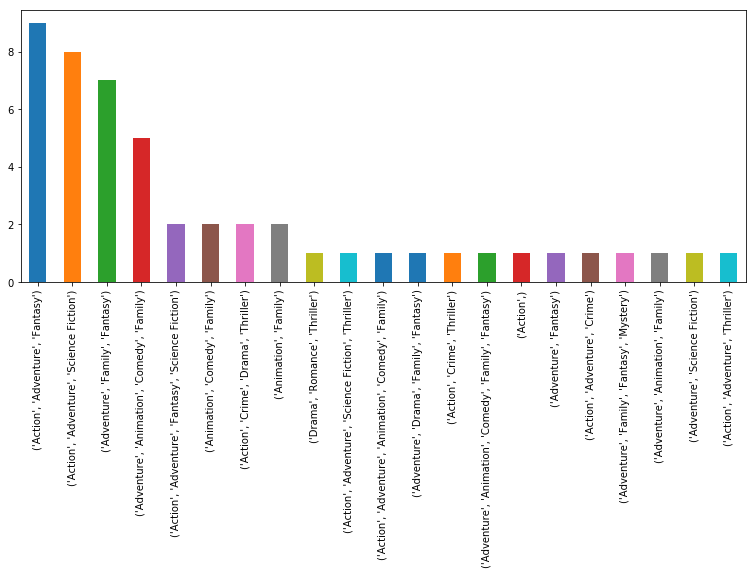

In [9]:
pd.value_counts(df.head(50)['genres']).plot.bar(figsize = (13, 5))
f1 = plt.gcf()

In order to confirm the potential correlation with the movie revenue, we performed an OLS regression on all the combined genres included in our dataset, using an alpha value of 0.05.

## Linear Model Of Movie Genres and Revenue

We found, from the OLS regression output, that the combined genres of ('Action', 'Adventure', 'Fantasy') has a p value of less than 0.001. The combined genre of ('Action', 'Adventure', 'Science Fiction') also has a p value of less than 0.001. The same p value applies to the combined genres of ('Adventure', 'Family', 'Fantacy'), and ('Adventure', 'Animation', 'Comedy', 'Family'). It is then confirmed that there is a correlation between these genres and the movie revenue.

In [69]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~genres",df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit(disp = True)
print(str(res_1.summary())[0:2980])

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     4.506
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          6.93e-257
Time:                        01:47:54   Log-Likelihood:            -1.4508e+05
No. Observations:                7254   AIC:                         2.918e+05
Df Residuals:                    6450   BIC:                         2.973e+05
Df Model:                         803                                         
Covariance Type:            nonrobust                                         
                                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

since there are too many genre types to print we took out the top 10 genres that has the lowest p-values

In [73]:
Genres_Pvalues = pd.DataFrame(res_1.model.exog_names, columns = ['Genres'])
Genres_Pvalues['Pvalues'] =  res_1.pvalues
pd.set_option('display.float_format','{:.4f}'.format)
Genres_Pvalues = Genres_Pvalues.sort_values(by = ['Pvalues'],ascending=True)
Genres_Pvalues.head(10)

,Genres,Pvalues
483,"production_countries[T.('New Zealand', 'United...",0.0000
536,"production_countries[T.('United Kingdom', 'Uni...",0.0000
60,"production_countries[T.('Bahamas', 'Dominica',...",0.0000
538,production_countries[T.('United States of Amer...,0.0000
194,"production_countries[T.('China', 'United State...",0.0000
395,"production_countries[T.('Germany', 'United Sta...",0.0000
315,"production_countries[T.('France', 'Malta', 'Un...",0.0000
45,"production_countries[T.('Australia', 'United S...",0.0000
214,"production_countries[T.('Czech Republic', 'Uni...",0.0000
394,"production_countries[T.('Germany', 'United Kin...",0.0000


Next, we inspected the possible correlation between movie production countries and the movie revenue. We plotted a bar graph of the 100 most profitable movies according to their country of production.

## Movie production countries from top 100 movie revenues

As indicated by the bar graph, more than 60 movies were produced by ('United States of America'), suggesting that the ('United States of America') is potentially correlated with the movie revenue. We used an alpha value of 0.05.

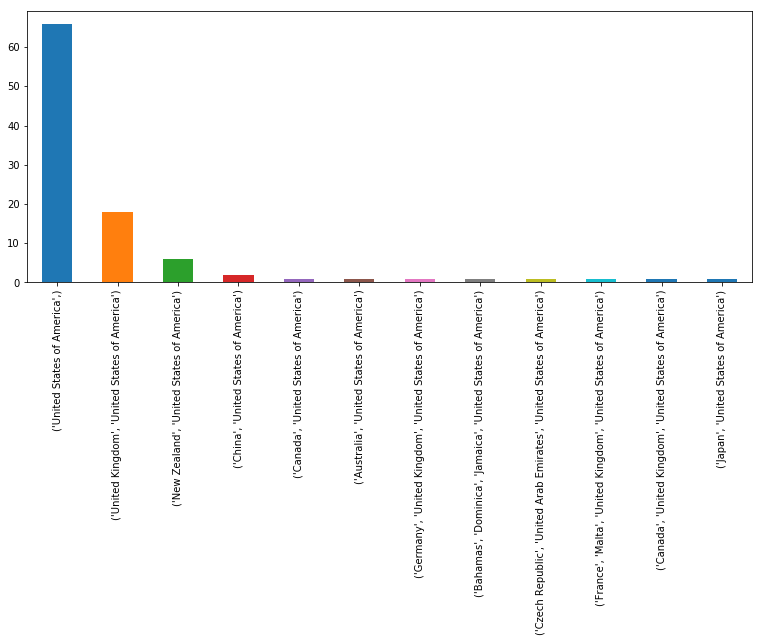

In [12]:
pd.value_counts(df.head(100)['production_countries']).plot.bar(figsize = (13, 5))
f1 = plt.gcf()

An OLS regression test was performed to analyze the correlation between each country of production and the movie revenue. As expected, the ('United States of America') has a p value of less than 0.001.

In [74]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~production_countries",df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(print(str(res_1.summary())[0:3000]))

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.526
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           6.27e-13
Time:                        01:56:14   Log-Likelihood:            -1.4627e+05
No. Observations:                7254   AIC:                         2.936e+05
Df Residuals:                    6715   BIC:                         2.973e+05
Df Model:                         538                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                            coef    std err       

since there are too many production country types to print we took out the top 10 production country types that has the lowest p-values

In [79]:
Genres_Pvalues = pd.DataFrame(res_1.model.exog_names, columns = ['production_countries'])
Genres_Pvalues['production_countries'] = Genres_Pvalues['production_countries'].str[20:]
Genres_Pvalues['Pvalues'] =  res_1.pvalues
pd.set_option('display.float_format','{:.4f}'.format)
Genres_Pvalues = Genres_Pvalues.sort_values(by = ['Pvalues'],ascending=True)
Genres_Pvalues.head(10)

,production_countries,Pvalues
483,"[T.('New Zealand', 'United States of America')]",0.0000
536,"[T.('United Kingdom', 'United States of Americ...",0.0000
60,"[T.('Bahamas', 'Dominica', 'Jamaica', 'United ...",0.0000
538,"[T.('United States of America',)]",0.0000
194,"[T.('China', 'United States of America')]",0.0000
395,"[T.('Germany', 'United States of America')]",0.0000
315,"[T.('France', 'Malta', 'United Kingdom', 'Unit...",0.0000
45,"[T.('Australia', 'United States of America')]",0.0000
214,"[T.('Czech Republic', 'United Arab Emirates', ...",0.0000
394,"[T.('Germany', 'United Kingdom', 'United State...",0.0000


The title length could be a potential contributor to people's desire of watching the movie, which then determines the movie revenue.

## Relation between the title length and revenue

We counted the number of characters contained in each movie title, which is later designated as the title length.

In [14]:
lenth_rev = df[['title','revenue']]
lenth_rev['title'] = lenth_rev['title'].apply(len)

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


A scatter plot was made for titl lenth vs. revenue. A linear regression was computed and drawn on top of the scatter plot. The final plot indicats that there is some kind of correlation between the title length and the movie revenue.

In [15]:
a1, b1 = np.polyfit(lenth_rev['title'], lenth_rev['revenue'], 1)
title_len = np.arange(0,80,dtype = 'float')
pred_rev = title_len * a1 + b1

Text(0, 0.5, 'revenue')

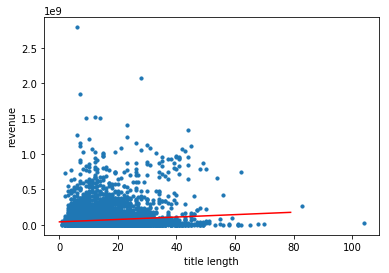

In [16]:
plt.scatter(x = lenth_rev['title'], y = lenth_rev['revenue'], s=10)
plt.plot(title_len, pred_rev, linestyle='-',color = "red")
plt.xlabel('title length')
plt.ylabel('revenue')

To confirm this, we used an OLS regression test to analyze the correlation between the title length and the movie revenue, with an alpha value of 0.05. The returned p value is less than 0.001, suggesting that there is a correlation between the title length and movie revenue. Yet,the R-squared value (0.009) indicates that a linear regression is a poor fitting for the correlation between the title length and movie revenue.

In [17]:
lenth_rev.rename(columns={'title':'title_len'}, inplace=True)
outcome_1, predictors_1 = patsy.dmatrices("revenue~title_len",lenth_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     69.34
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           9.83e-17
Time:                        01:10:05   Log-Likelihood:            -1.4666e+05
No. Observations:                7254   AIC:                         2.933e+05
Df Residuals:                    7252   BIC:                         2.933e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.306e+07   3.55e+06     12.138      0.0

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


The movie runtime could also contributes to the movie revenue by affecting audiences' physiological sensation. Thus we performed a linear regression on the scatter plot of movie runtime vs. movie revenue. As the plot has suggested, there is some kind of correlation between movie runtime and revenue.

## Relation between the movie runtime and revenue

Text(0, 0.5, 'revenue')

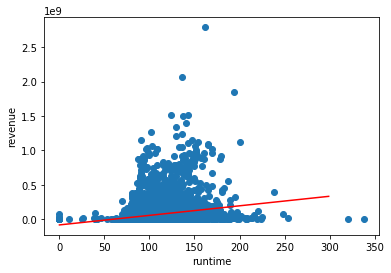

In [18]:
timelenth_rev = df[['runtime','revenue']]
a, b = np.polyfit(timelenth_rev['runtime'], timelenth_rev['revenue'], 1)
time_len = np.arange(0,300,dtype = 'float')
pred_rev = a * time_len + b 
plt.scatter(x = timelenth_rev['runtime'], y = timelenth_rev['revenue'])
plt.plot(time_len, pred_rev, linestyle='-',color = "red")
plt.xlabel('runtime')
plt.ylabel('revenue')

Again, we used an OLS regression to confirm our conjecture. The test returned a p value of 0.000, indicating a linear correlation between the movie runtime and the movie revenue.However,the R-squared value (0.041) indicates that a linear regression is a poor fitting for the correlation between the movie runtime and movie revenue.

In [19]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~runtime",timelenth_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     313.8
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           9.01e-69
Time:                        01:10:06   Log-Likelihood:            -1.4654e+05
No. Observations:                7254   AIC:                         2.931e+05
Df Residuals:                    7252   BIC:                         2.931e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.039e+07    8.6e+06     -9.352      0.0

People tend to have more spare time during summer. Thus it is possible that the movies released in summer have generally higher revenues than the movies released in other times of the year. We first plotted a bar graph of the release month for the 50 most profitable movies.

## Movie release month of top 50 movie revenues

According to the bar graph, June has the most movie release (14 movies).

In [20]:
date_rev = df[['release_date','revenue']]
date_rev['release_date']=date_rev['release_date'].str[5:7]

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


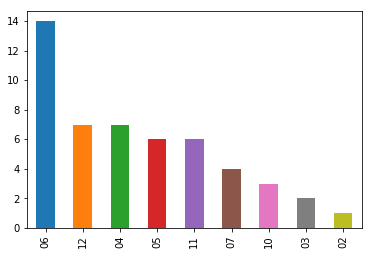

In [21]:
pd.value_counts(date_rev.head(50)['release_date']).plot.bar()
f1 = plt.gcf()

An OLS regression test was performed to provide further insight into the correlation between the release month and the movie revenue, using an alpha value of 0.05. June has a p value of 0.000, indicating that June is indeed correlated with higher movie revenues.

In [22]:
date_rev.rename(columns={'release_date':'release_month'}, inplace=True)
outcome_1, predictors_1 = patsy.dmatrices("revenue~release_month",date_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     26.24
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           2.99e-54
Time:                        01:10:06   Log-Likelihood:            -1.4655e+05
No. Observations:                7254   AIC:                         2.931e+05
Df Residuals:                    7242   BIC:                         2.932e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.213e+07   6

Because the potential audiences would go to online forums to see the comments and critiques of the movie before buying the ticket, the average vote posted online is expected to have an effect on the final movie revenue.

## Relation between the vote average and revenue

We created a scatter plot to visualize the data and then computed a linear regression baed on the scatter plot. As suggested by the plot, there is some kind of correlation between vote average and revenue.

Text(0, 0.5, 'revenue')

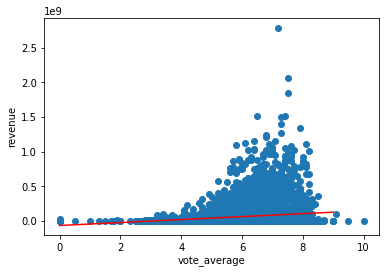

In [23]:
voteagv_rev = df[['vote_average','revenue']]
a, b = np.polyfit(voteagv_rev['vote_average'], voteagv_rev['revenue'], 1)
vot_average = np.arange(0,10,dtype = 'float')
pred_vote = a * vot_average + b
plt.scatter(x = voteagv_rev['vote_average'], y = voteagv_rev['revenue'])
plt.plot(vot_average, pred_vote, linestyle='-',color = "red")
plt.xlabel('vote_average')
plt.ylabel('revenue')

An OLS regression test has provided further information pertaining to the correlation between the average vote and the movie revenue. The test has returned a p values of 0.000, which is smaller than the alpha value used (0.05). This suggests the existance of a correlation. Yet, the R-squared value is 0.022, which suggests that a linear regression is a poor fitting for the correlation between the average vote and the movie revenue.

In [24]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~vote_average",voteagv_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     163.1
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           5.79e-37
Time:                        01:10:06   Log-Likelihood:            -1.4661e+05
No. Observations:                7254   AIC:                         2.932e+05
Df Residuals:                    7252   BIC:                         2.932e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.423e+07   1.06e+07     -6.080   

We speculated the possible correlation between bodget and revenue because audiences are often attracted by the special effects, which costs a significant portion of budget.

## Relation between the budget and revenue

We plotted the scatter plot with the budget in million dollars against the movie revenue. A linear regression was computed on the same scatter plot. According to the final plot, the budget appears to have a correlation with the movie revenue.

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'revenue')

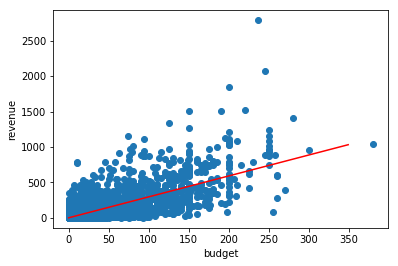

In [25]:
budget_rev = df[['budget','revenue']]
budget_rev['budget'] = budget_rev['budget']/1000000
budget_rev['revenue'] = budget_rev['revenue']/1000000
a, b = np.polyfit(budget_rev['budget'], budget_rev['revenue'], 1)
budget = np.arange(0,350,dtype = 'float')
pred_budget = a * budget + b
plt.scatter(x = budget_rev['budget'], y = budget_rev['revenue'])
plt.plot(budget, pred_budget, linestyle='-',color = "red")
plt.xlabel('budget')
plt.ylabel('revenue')

The OLS regression test has returned a p value of 0.000, which is smaller than the alpha value we used (0.05). Meanwhile, the R-squared value is 0.557. These two results indicate that there is a linear collrelation between the movie budget and the movie revenue.

In [26]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~budget",budget_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     9108.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        01:10:07   Log-Likelihood:                -43523.
No. Observations:                7254   AIC:                         8.705e+04
Df Residuals:                    7252   BIC:                         8.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9546      1.344      1.454      0.1

## Revenue Trend Over The Years

In [27]:
year_rev = df[['release_date','revenue']]
year_rev['release_date']=year_rev['release_date'].str[0:4]
year_rev['release_date'] = year_rev['release_date'].apply(int)

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


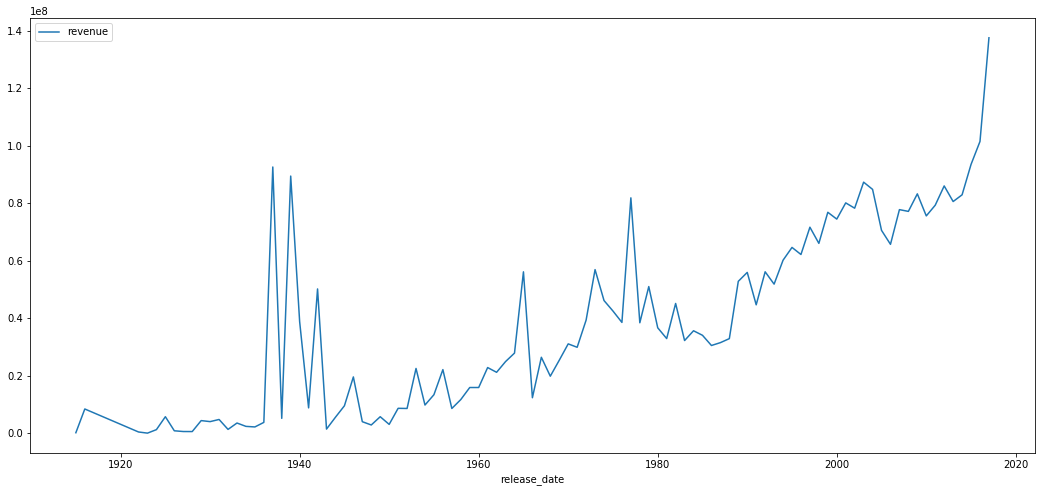

In [28]:
year = year_rev.groupby('release_date').mean()
ax = year.plot(figsize = (18, 8))

# Ethics & Privacy

Our question is about what contribute to a movie’s revenue. The datasets we used are extracted from two large and famous movie databases. The user names or any other user information are not presented in the datasets, so there is no worry about the privacy or informed consent problem. The datasets included any language, any genre and from any country, so there would be no territory bias on the movies themselves. However, we were concerned about the user distribution of the two movie databases, in other words, who would make the ratings. We found that data from these two databases were frequently used to determine the contribution of factors to the revenue, while they were used to predict American movie revenues most of the time. We thought that the reason behind this was that they were used mainly by users from English-speaking countries and were popular in the US. 

There is also a concern about the balance between movie revenue and diversity protection. By figuring out how the movie’s genre, content, and the megascore, etc affect the revenue, movie investors would have an easier time to decide which movie would be more profitable.  However, after finding out that there is a specific type of movie that will make a higher revenue,  the society will have a higher probability to have more of that type of movie being produced since less people will be willing to take a higher risk. This kind of studies will potentially lead to a less diverse movie market.

The movie trend at a certain time era may also affect the revenue. For example, people now may be more into action movies, and then romantic movies may become more popular after a few years. Thus there may be bias over the time frame of the data set collected. Although we are trying to use up-to-date data, the prediction model needs to be updated in the future in order to predict the most accurate results that reflect the trend of that particular time. 

# Conclusion & Discussion

*Fill in your discussion information here*